In [1]:
 import pandas as pd

In [2]:
credit = pd.read_csv('german_credit_data.csv')
credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [3]:
 del credit['Unnamed: 0'] 

In [4]:
credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


The summary statistics are given in the following code. Accordingly, the average age
 of the customers is roughly 35, average job type is skilled, average credit amount and
 duration are nearly 3,271 and 21, respectively. Additionally, the summary statistics
 tell us that the credit amount variable shows a relatively high standard deviation as
 expected. The duration and age variables have a very similar standard deviation, but
 the duration moves within a narrower interval as its minimum and maximum values
 are 4 and 72, respectively. As job is a discrete variable, it is natural to expect low dis
persion and we have it:

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = (10,6) 

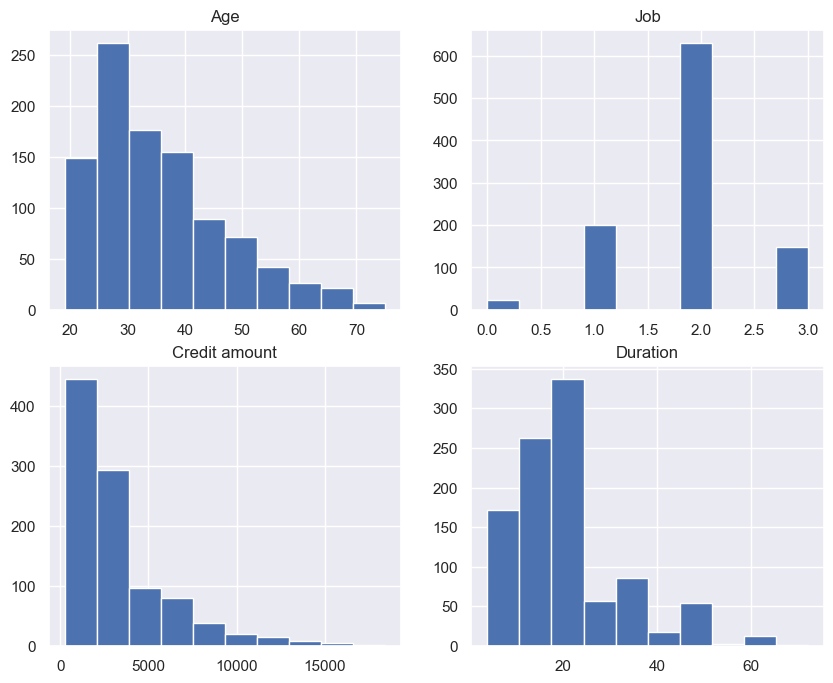

In [6]:
numerical_credit = credit.select_dtypes(exclude='O') 
plt.figure(figsize=(10, 8))
k = 0
cols = numerical_credit.columns
for i, j in zip(range(len(cols)), cols):
    k +=1
    plt.subplot(2, 2, k)
    plt.hist(numerical_credit.iloc[:, i])
    plt.title(j)

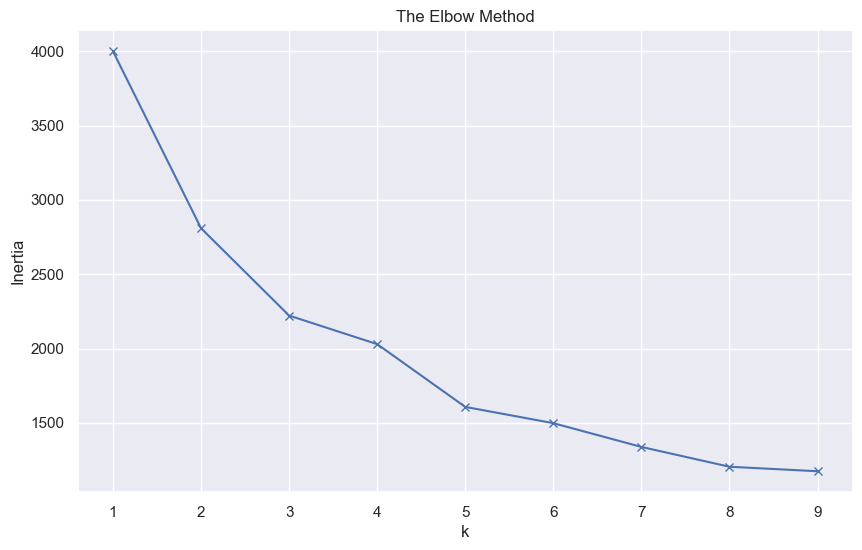

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit) 
distance = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(scaled_credit)
    distance.append(kmeans.inertia_) 
plt.plot(range(1, 10), distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

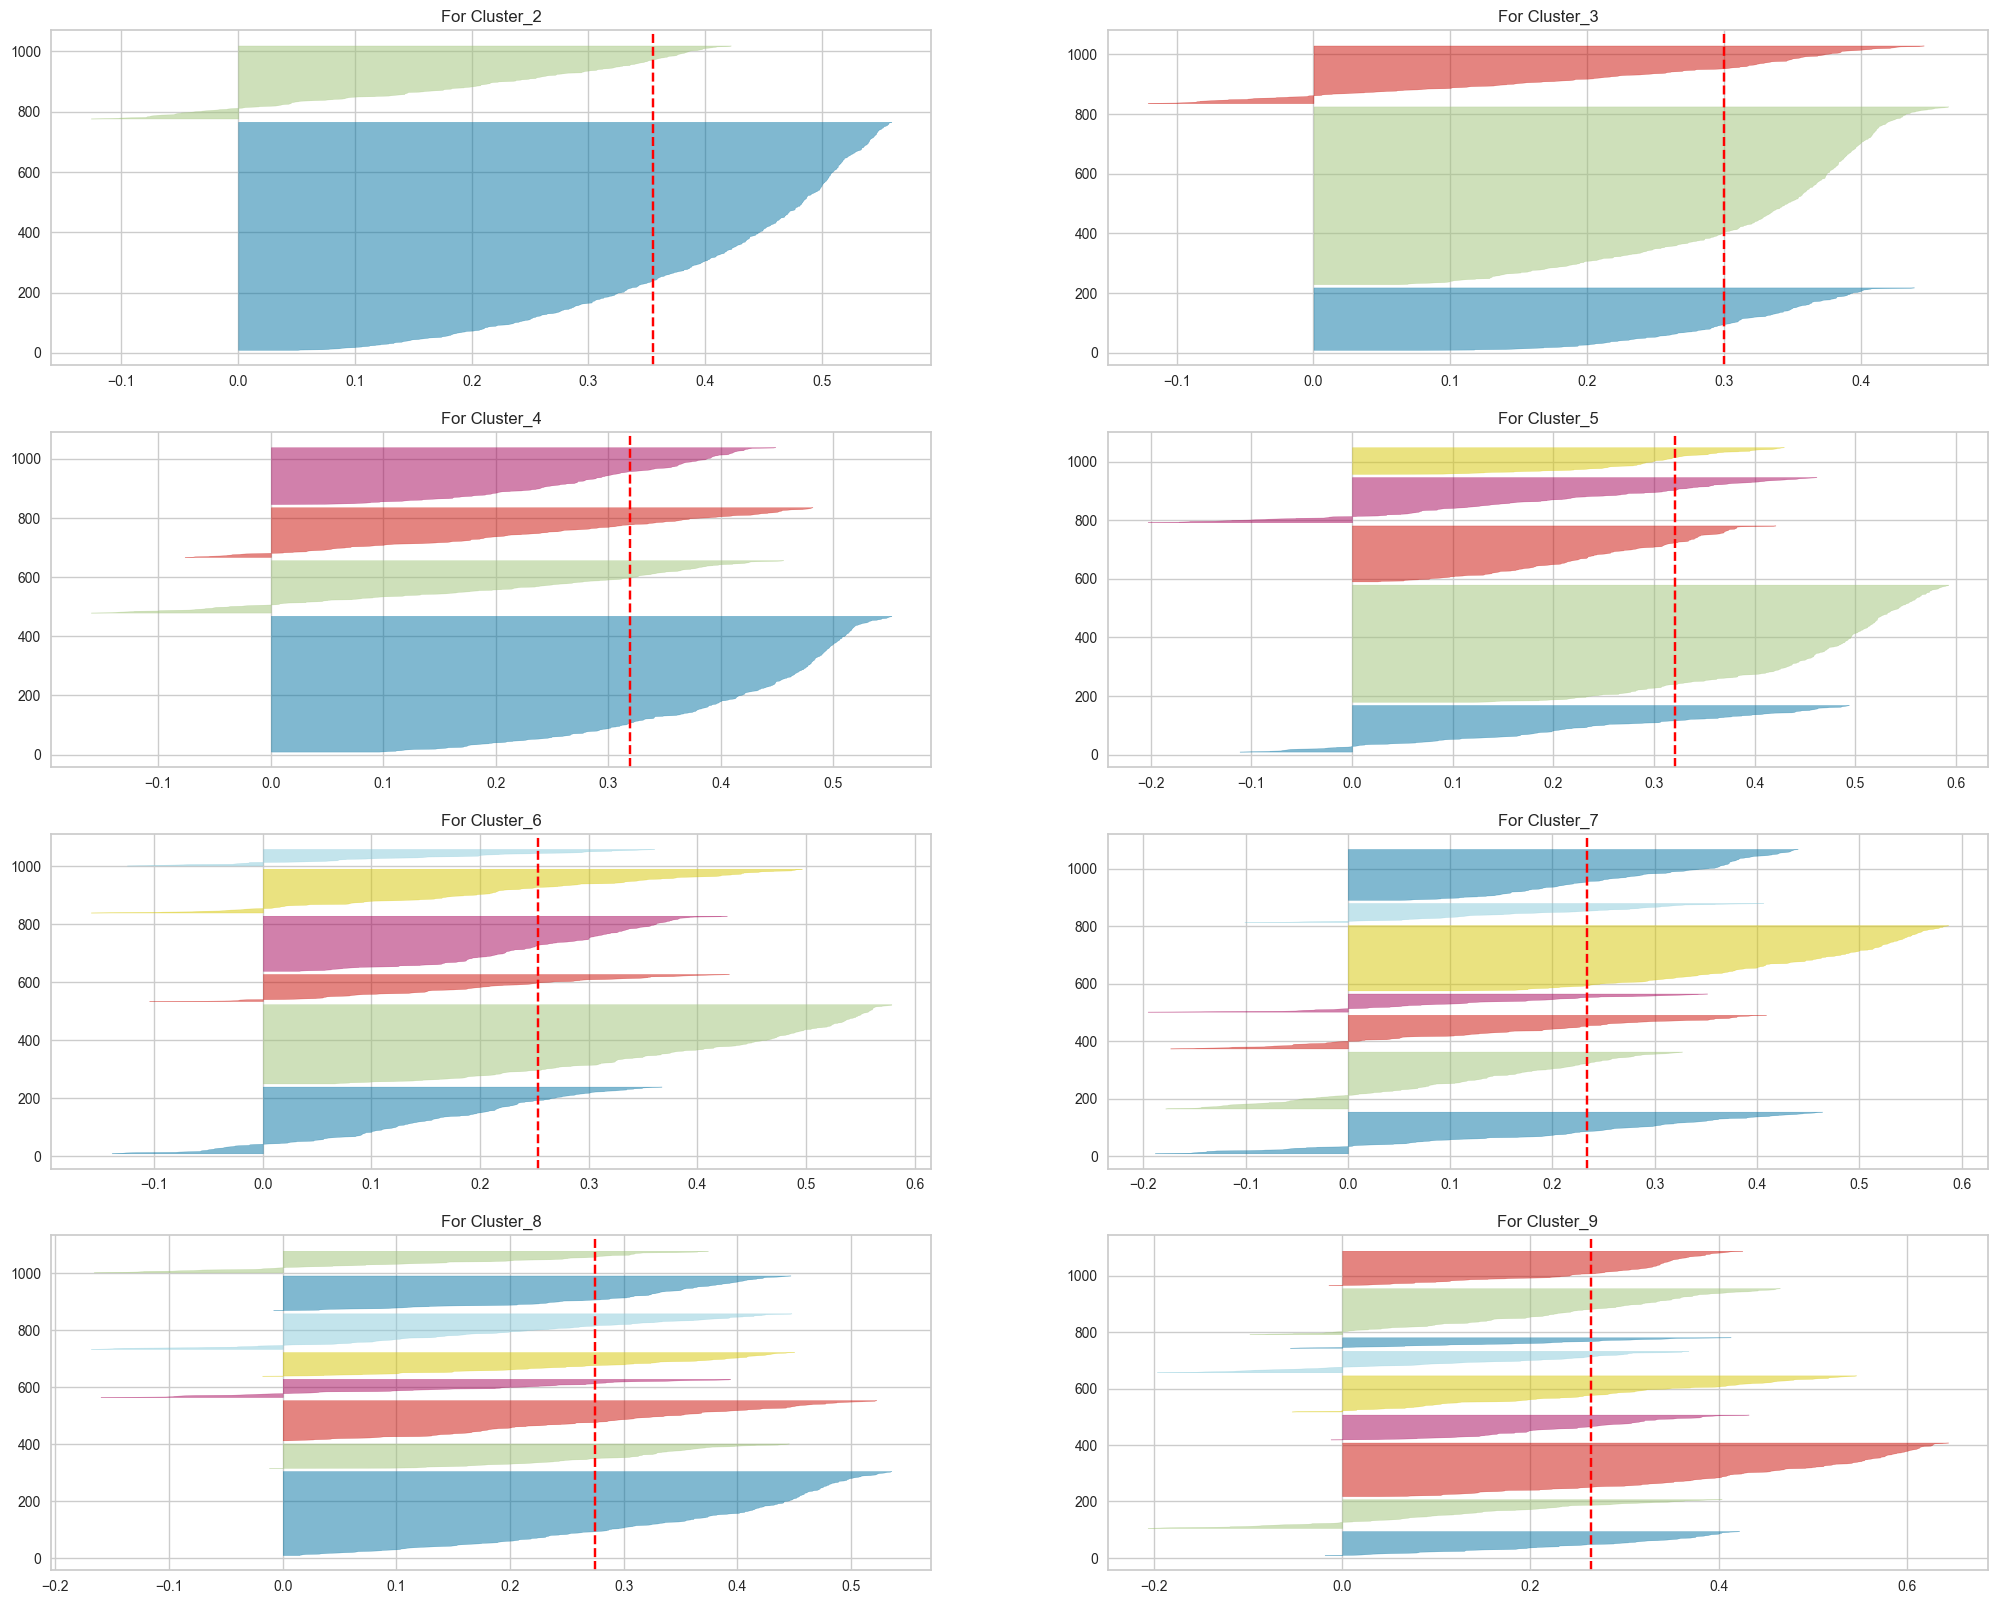

In [8]:
from sklearn.metrics import silhouette_score 
from yellowbrick.cluster import SilhouetteVisualizer 
fig, ax = plt.subplots(4, 2, figsize=(25, 20))
for i in range(2, 10):
    km = KMeans(n_clusters=i)
    q, r = divmod(i, 2) 
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick',
    ax=ax[q - 1][r]) 
    visualizer.fit(scaled_credit)
    ax[q - 1][r].set_title("For Cluster_"+str(i))

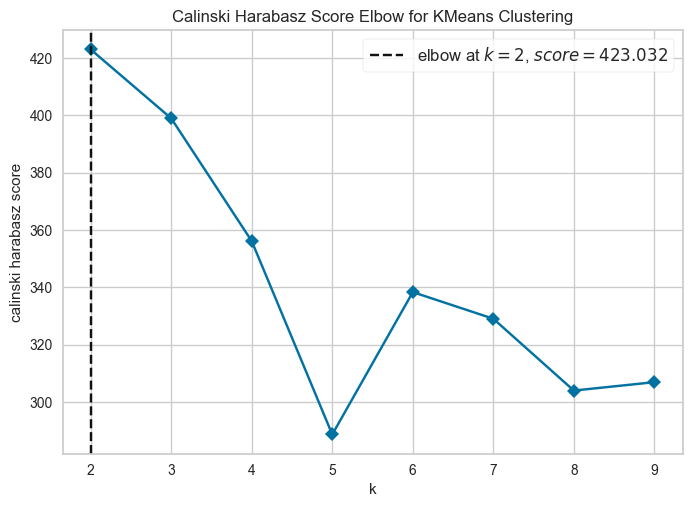

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10),
                            metric='calinski_harabasz',
                            timings=False) 
visualizer.fit(scaled_credit)
visualizer.show()

In [39]:
from ga.optimalK import OptimalK 
optimalK = OptimalK(n_jobs=8, parallel_backend='joblib') 
n_clusters = optimalK(scaled_credit, cluster_array=np.arange(1, 10)) 
gap_result = optimalK.gap_df 
gap_result.head()

ModuleNotFoundError: No module named 'gap_stat'

In [42]:
plt.plot(gap_result.n_clusters, gap_result.gap_value)
min_ylim, max_ylim = plt.ylim()
plt.axhline(np.max(gap_result.gap_value), color='r',
linestyle='dashed', linewidth=2)
plt.title('Gap Analysis')
plt.xlabel('Number of Cluster')
plt.ylabel('Gap Value')
plt.show()

NameError: name 'gap_result' is not defined

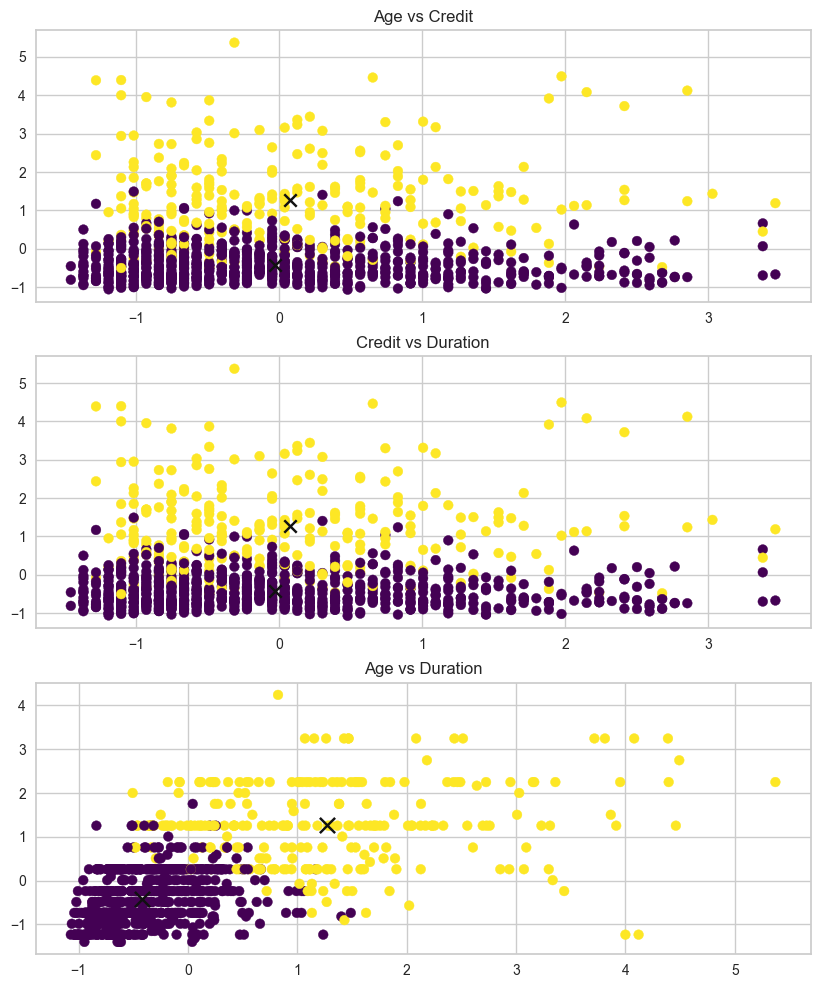

In [43]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(scaled_credit)
plt.figure(figsize=(10, 12))
plt.subplot(311)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2],
c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
kmeans.cluster_centers_[:, 2], s = 80,
marker= 'x', color = 'k')
plt.title('Age vs Credit')
plt.subplot(312)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2],
c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
kmeans.cluster_centers_[:, 2], s = 80,
marker= 'x', color = 'k')
plt.title('Credit vs Duration')
plt.subplot(313)
plt.scatter(scaled_credit[:, 2], scaled_credit[:, 3],
c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 2],
kmeans.cluster_centers_[:, 3], s = 120,
marker= 'x', color = 'k')
plt.title('Age vs Duration')
plt.show()

In [44]:
clusters, counts = np.unique(kmeans.labels_, return_counts=True) 
cluster_dict = {}
for i in range(len(clusters)):
    cluster_dict[i] = scaled_credit[np.where(kmeans.labels_==i)] 
    credit['clusters'] = pd.DataFrame(kmeans.labels_) 
df_scaled = pd.DataFrame(scaled_credit)
df_scaled['clusters'] = credit['clusters']